In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer , NumericalvsNumerical , CategoricalvsCategorical
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#Load the data

df = pd.read_csv('../extracted_data/credit_risk_dataset.csv')
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


* This dataset contains columns simulating credit bureau data. Below is a table with the feature name and explanation.

| Feature Name | Description |
| --- | --- |
| person_age | Age |
| person_income | Annual Income |
| person_home_ownership | Home ownership |
| person_emp_length | Employment length (in years) |
| loan_intent | Loan intent |
| loan_grade | Loan grade |
| loan_amnt | Loan amount |
| loan_int_rate | Interest rate |
|loan_status  | Loan status (0 is non default 1 is default)|
| loan_percent_income | Percent income |
| cb_person_default_on_file | Historical default |
| cb_preson_cred_hist_length | Credit history length |

* The target variable will be **loan_status**. 
*Consequently, our task is reduced to a **binary classification problem**.

## Step 1: Basic Data Inspection

In [5]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection

data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


 DataTypes & Non-null Counts : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ 

In [6]:
#switch strategy to summary statistics inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


 Summary Statistics (Numerical Features): 

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000

---

## Step 2: Missing Values and duplicates analysis

Starting Analysis...

Missing Values Count by Column:
                            Total  Percentage
loan_int_rate                3116    9.563856
person_emp_length             895    2.747000
person_income                   0    0.000000
person_age                      0    0.000000
person_home_ownership           0    0.000000
loan_intent                     0    0.000000
loan_grade                      0    0.000000
loan_amnt                       0    0.000000
loan_status                     0    0.000000
loan_percent_income             0    0.000000
cb_person_default_on_file       0    0.000000
cb_person_cred_hist_length      0    0.000000

Visualizing Missing Values...


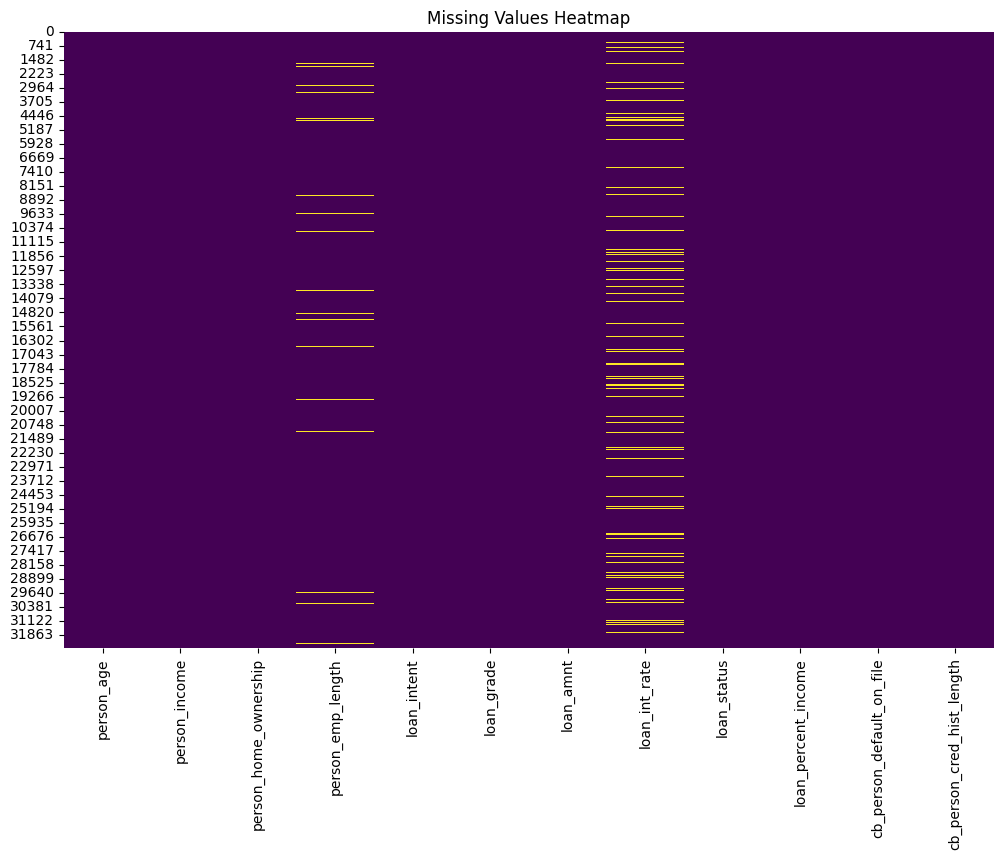


Finding Duplicates...
The number of duplicated values: 165
Analysis complete...


In [7]:
# Step 2: Missing Values and duplicates analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

#### **1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

#### **2. Identifying Columns with Missing Data:**
- Look for columns with significant amounts of yellow. These columns have a higher proportion of missing data.
  - For instance, in your heatmap, columns like `Person_emp_length`, `loan_int_rate`have substantial yellow, indicating that these features have missing values.

#### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

#### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.
  - In your heatmap, some columns have little to no missing values, while others have substantial missingness. Decisions will need to be made on whether to impute, drop, or handle these features differently.


### <center> **Insights** </center>

#### **1. Data Types and Non-null Counts:**
- The dataset contains **32581 entries** and **12 columns**.
- **Data Types**: There are 3 columns with `float64` data type, 5 columns with `int64` data type, and 4 columns with `object` data type.
  - **Numerical Features**: These include features like `person_age`, `person_income`, `person_emp_length`, `loan_amnt`, `loan_int_rate`, `loan_status`, `loan_percent_income`, `cb_person_cred_hist_length`
  - **Categorical Features**: Features like `person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file` are categorical.

#### **2. Summary Statistics:**
- **Numerical Features**:
  - **Target Variable : `Loan_Status`** has high number of non default compared to default 
  - `Person_age` ranges from **20 and 144** (Outliers are present), with a mean of **27 years** , while **75%** of the individuals are below **30yrs** .
  - `Loan_Amount` ranges from **500 and 35000** with a mean of **9589** , while **75%** loan amounts are below **12200** .
  - `Loan_int_rate` ranges from **5.42 and 23%** with a mean of **11%** . This shows a distribution of loan percents based on loan grades.

  - **Categorical Features**:
  - `person_home_ownership` has **4 unique values**, with `rented and mortgaged` being the most common loan borrower . 
  - `loan_grade` having `A and B` the highest loans given
  - `cb_person_default_on_file` have the data regarding historical default of the borrowers
  - Several other features which will be crucial in predicting `loan_status`.

#### **3. Missing Values Analysis:**
- **Columns with Significant Missing Values**:
  - `Loan_int_rate` has **9%** of missing values and `person_emp_length` has **2.74%** of missing values.
  -  Based on the distribution `loan_int_rate` should be imputed with **mean** and `person_emp_length` must be imputed with **median** as it follows a skewed distribution 
  
  #### **4. Duplicates values analysis**
  - We can see **165** duplicate values which can deleted as the number is too less comparatively 
  

  
### **Issues to be Addressed Later :**

1. **Handling Missing Data:**
  -  Based on the distribution `loan_int_rate` should be imputed with **mean** and `person_emp_length` must be imputed with **median** as it follows a skewed distribution 

2. **Outlier Detection and Handling**:
   - Features like `person_age` and `person_emp_length` shows a significant range , indicating potential outliers . These will need to be detected and handled appropriately to avoid skewing model predictions

3. **Categorical Encoding**:
   - Categorical features like ``person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file` have unique values. Decisions need to be made on how to encode these (e.g., one-hot encoding, label encoding, or frequency encoding) based on their relationship with the target variable

4. **Feature Engineering**:
   - Based on the insights, certain features might need to be engineered (e.g., combining related features, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.

5. **Correlation and Multicollinearity**:
   - Check for mutli-colinearity issues to avoid model prediction performance issues   
   
---

## Step 3 : Univariate Analysis

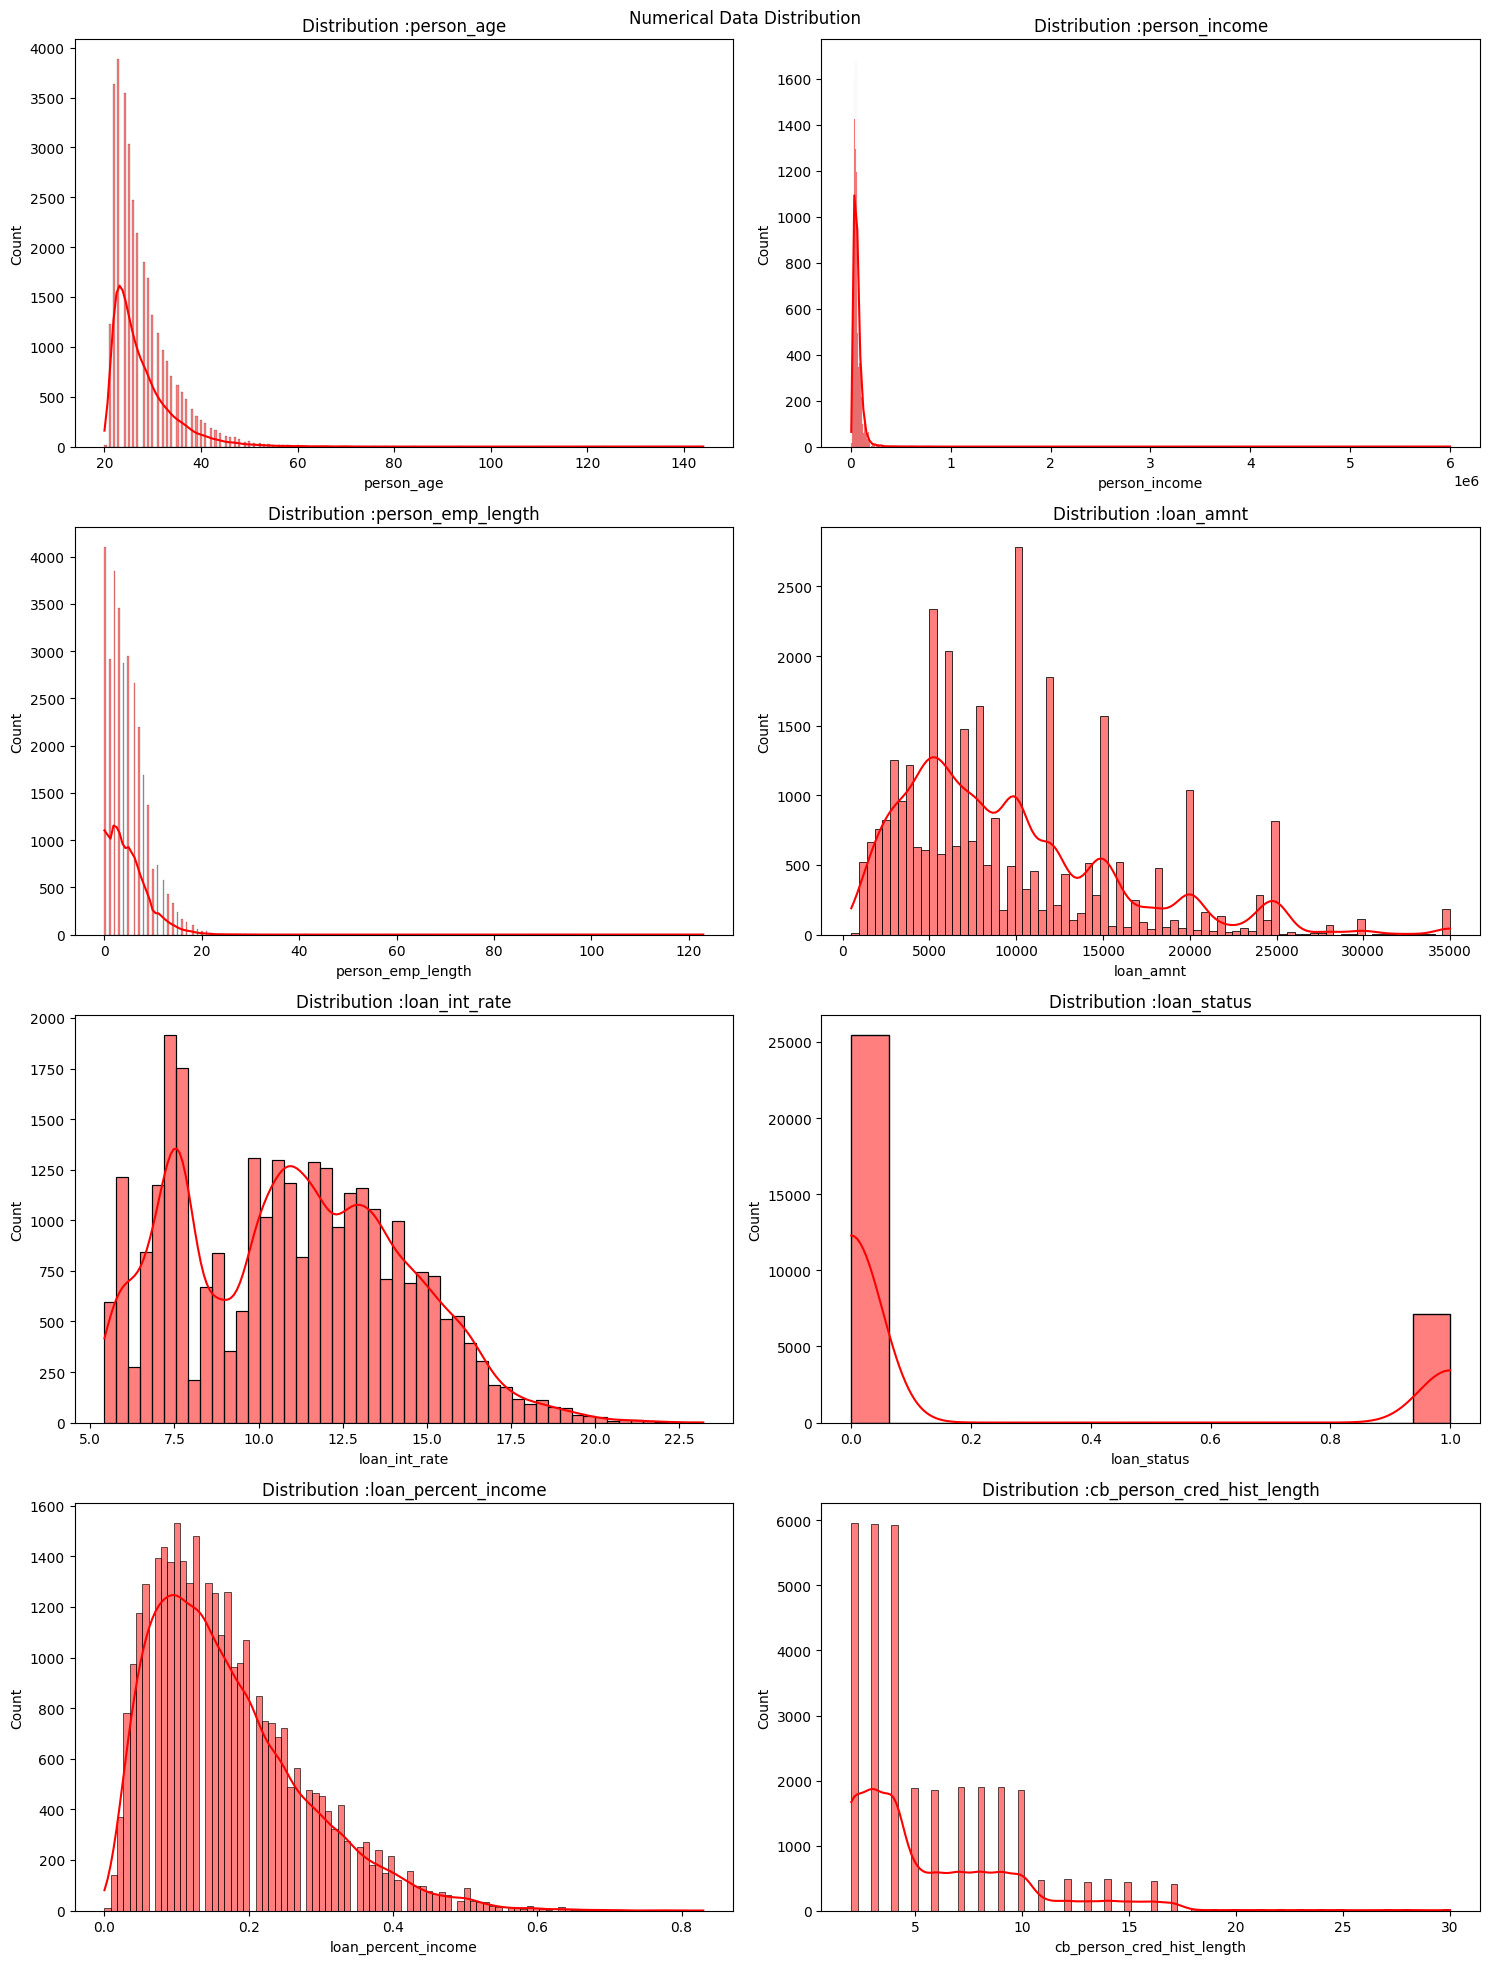

In [8]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df)

In [9]:
df.shape

(32581, 12)

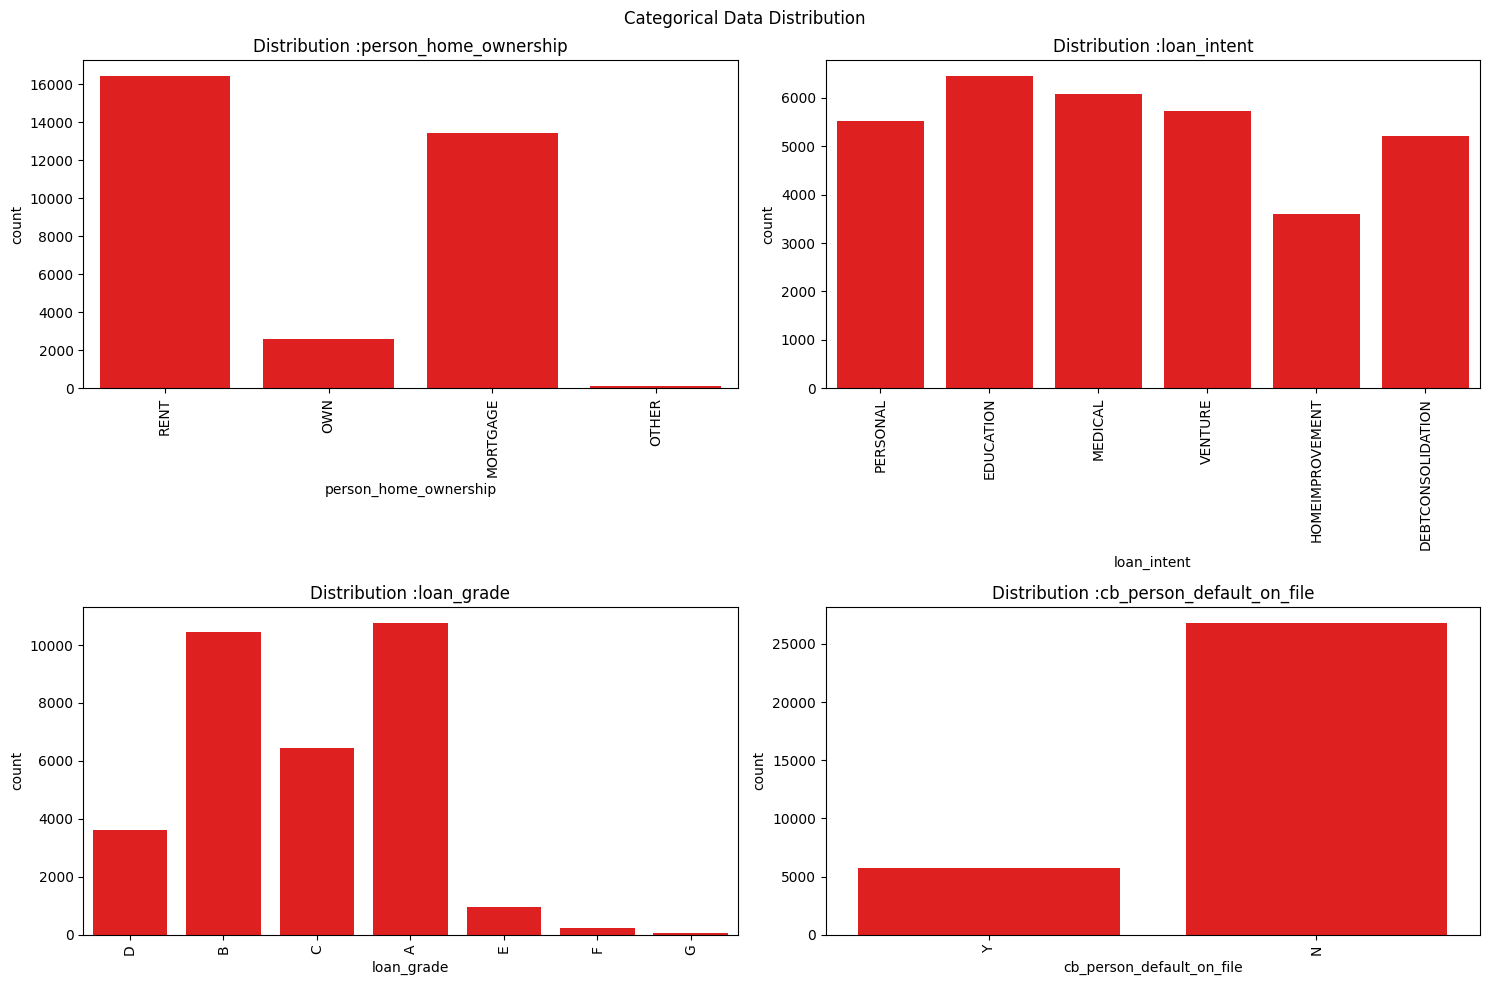

In [10]:
#Analysing categorical feature 
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df)

---

## Step 4 : Bivariate Analysis

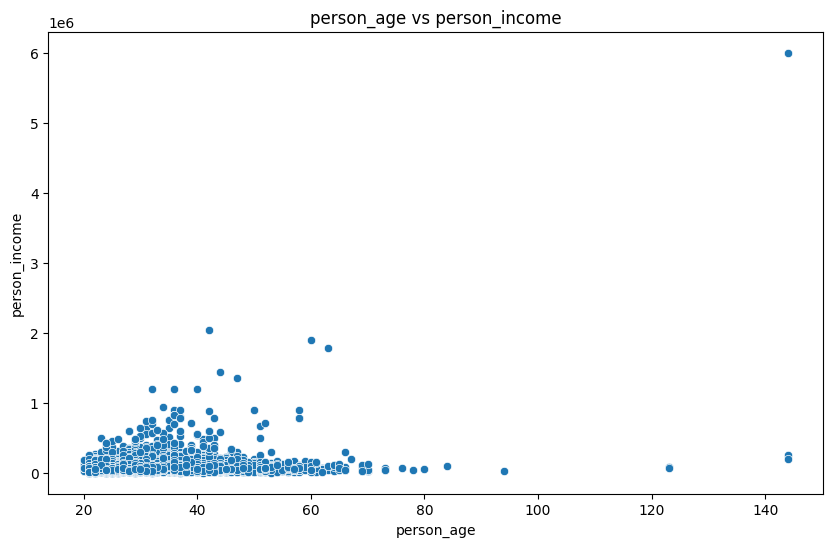

In [11]:
bivariate_analyzer = BivariateAnalyzer(NumericalvsNumerical())
bivariate_analyzer.execute_analysis(df, 'person_age', 'person_income')

In [12]:
df.select_dtypes(include='O').columns.tolist()

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

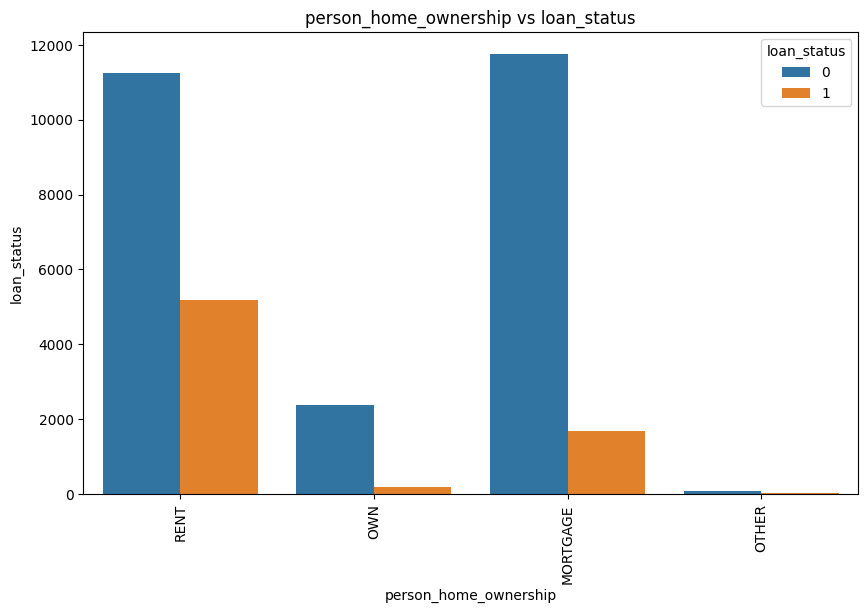

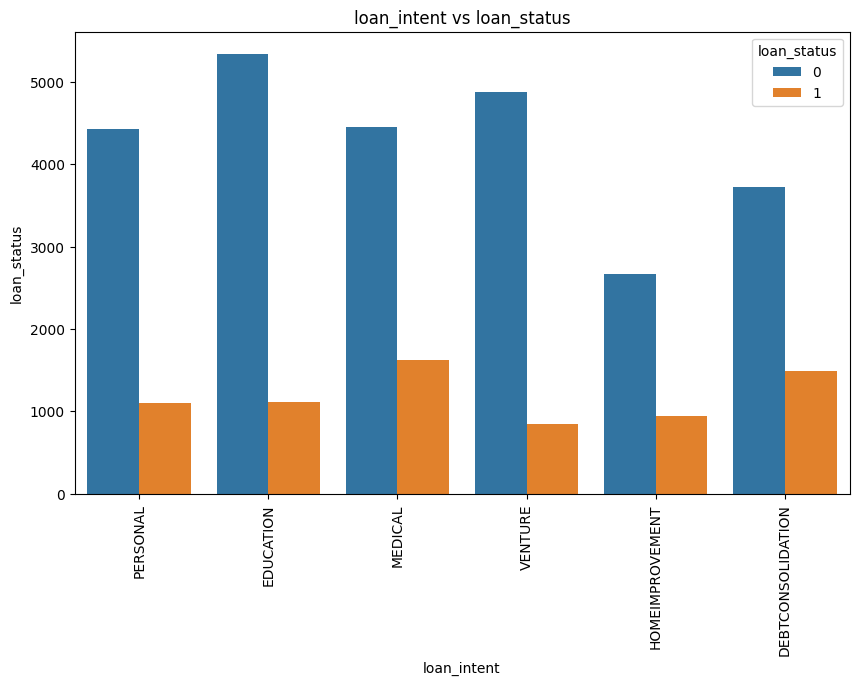

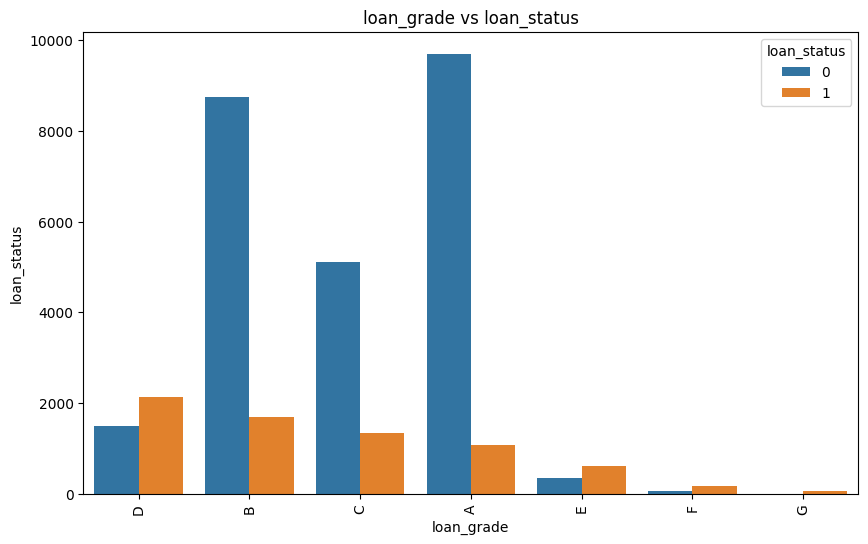

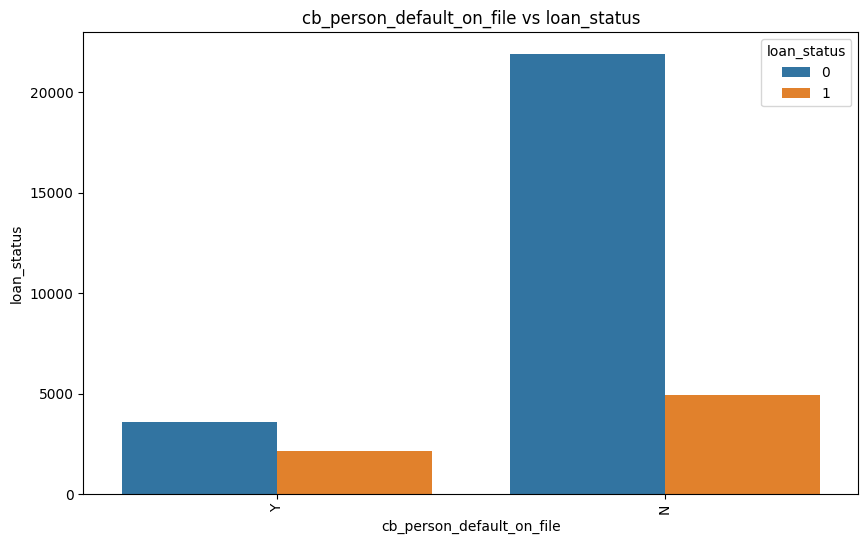

In [13]:
bivariate_analyzer.set_strategy(CategoricalvsCategorical())
for i in df.select_dtypes(include='O').columns.tolist():
    if i != 'loan_status':
        bivariate_analyzer.execute_analysis(df , i, 'loan_status')

### **Insights from Univariate and Bivariate Analysis**

#### **Step 3: Univariate Analysis**

1. **Person Age (Numerical Feature)**:
    - **Insight**: The distribution of `Person age` is positively skewed, with the majority of borrowers falling between the age 20 & 50 yrs .The peak frequency is around 25 age.
    - **Implication**: This skewness suggests that most borrowers in the dataset are relatively young & below 30 yrs .The long tail on the right side indicates a small number of borrowers above age 50 , which may need special consideration during modeling (e.g., applying a log transformation to normalize the distribution). Also we can see there are borrowers above 80 yrs old (which is an outlier & needs to be checked in feature engineering)

2. **Loan Intent (Categorical Feature)**:
   - **Insight**: The `Loan Intent` feature shows a varied distribution, with Education & Medical loan being the most borrowed which is followed venture & personal loan .
   - **Implication**: There is a almost equal distribution in loan intent which implies that the demand for loan is more in all the intent

#### **Step 4: Bivariate Analysis**

1. **Person home ownership vs loan status**:
   - **Insight**: We can see high number of loan defaultors in mortgaged & rented home borrowers with rented home borrowers being the highest . Subsequently they have high repaid loans also . Own house borrowers are least loan borrowers .
   - **Implication**: Homeowners with rentals or mortgages often take more loans due to higher living costs, home improvements, debt consolidation, and investment properties. They face higher default rates due to financial hardships, negative equity, high debt levels, and poor financial management.

2. **Loan intent vs. Loan status**:
   - **Insight**: We can observe that there is high number of loan defaultors in Medical & Debt Consolidation loan borrowers. Venture & Home improvement have least defaultors . Education and venture loans have high repaid loans 
   - **Implication**: Medical emergencies and unexpected health issues can lead to significant financial strain making it difficult for borrowers to keep up with loan repayments.Borrowers who consolidate multiple debts may already be struggling with high levels of debt, and adding a consolidation loan can increase their financial burden.

---
## Step 5 : MultiVariate Analysis

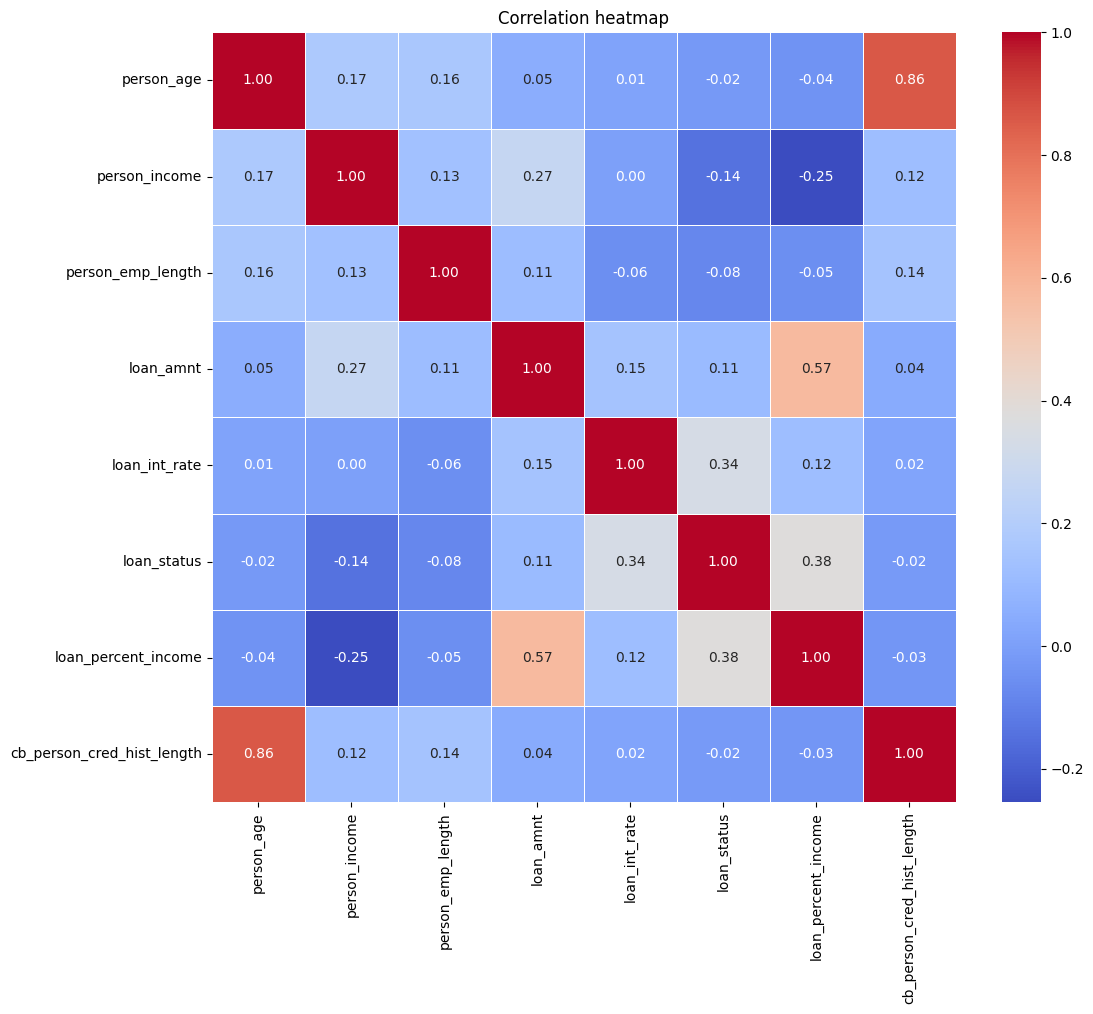

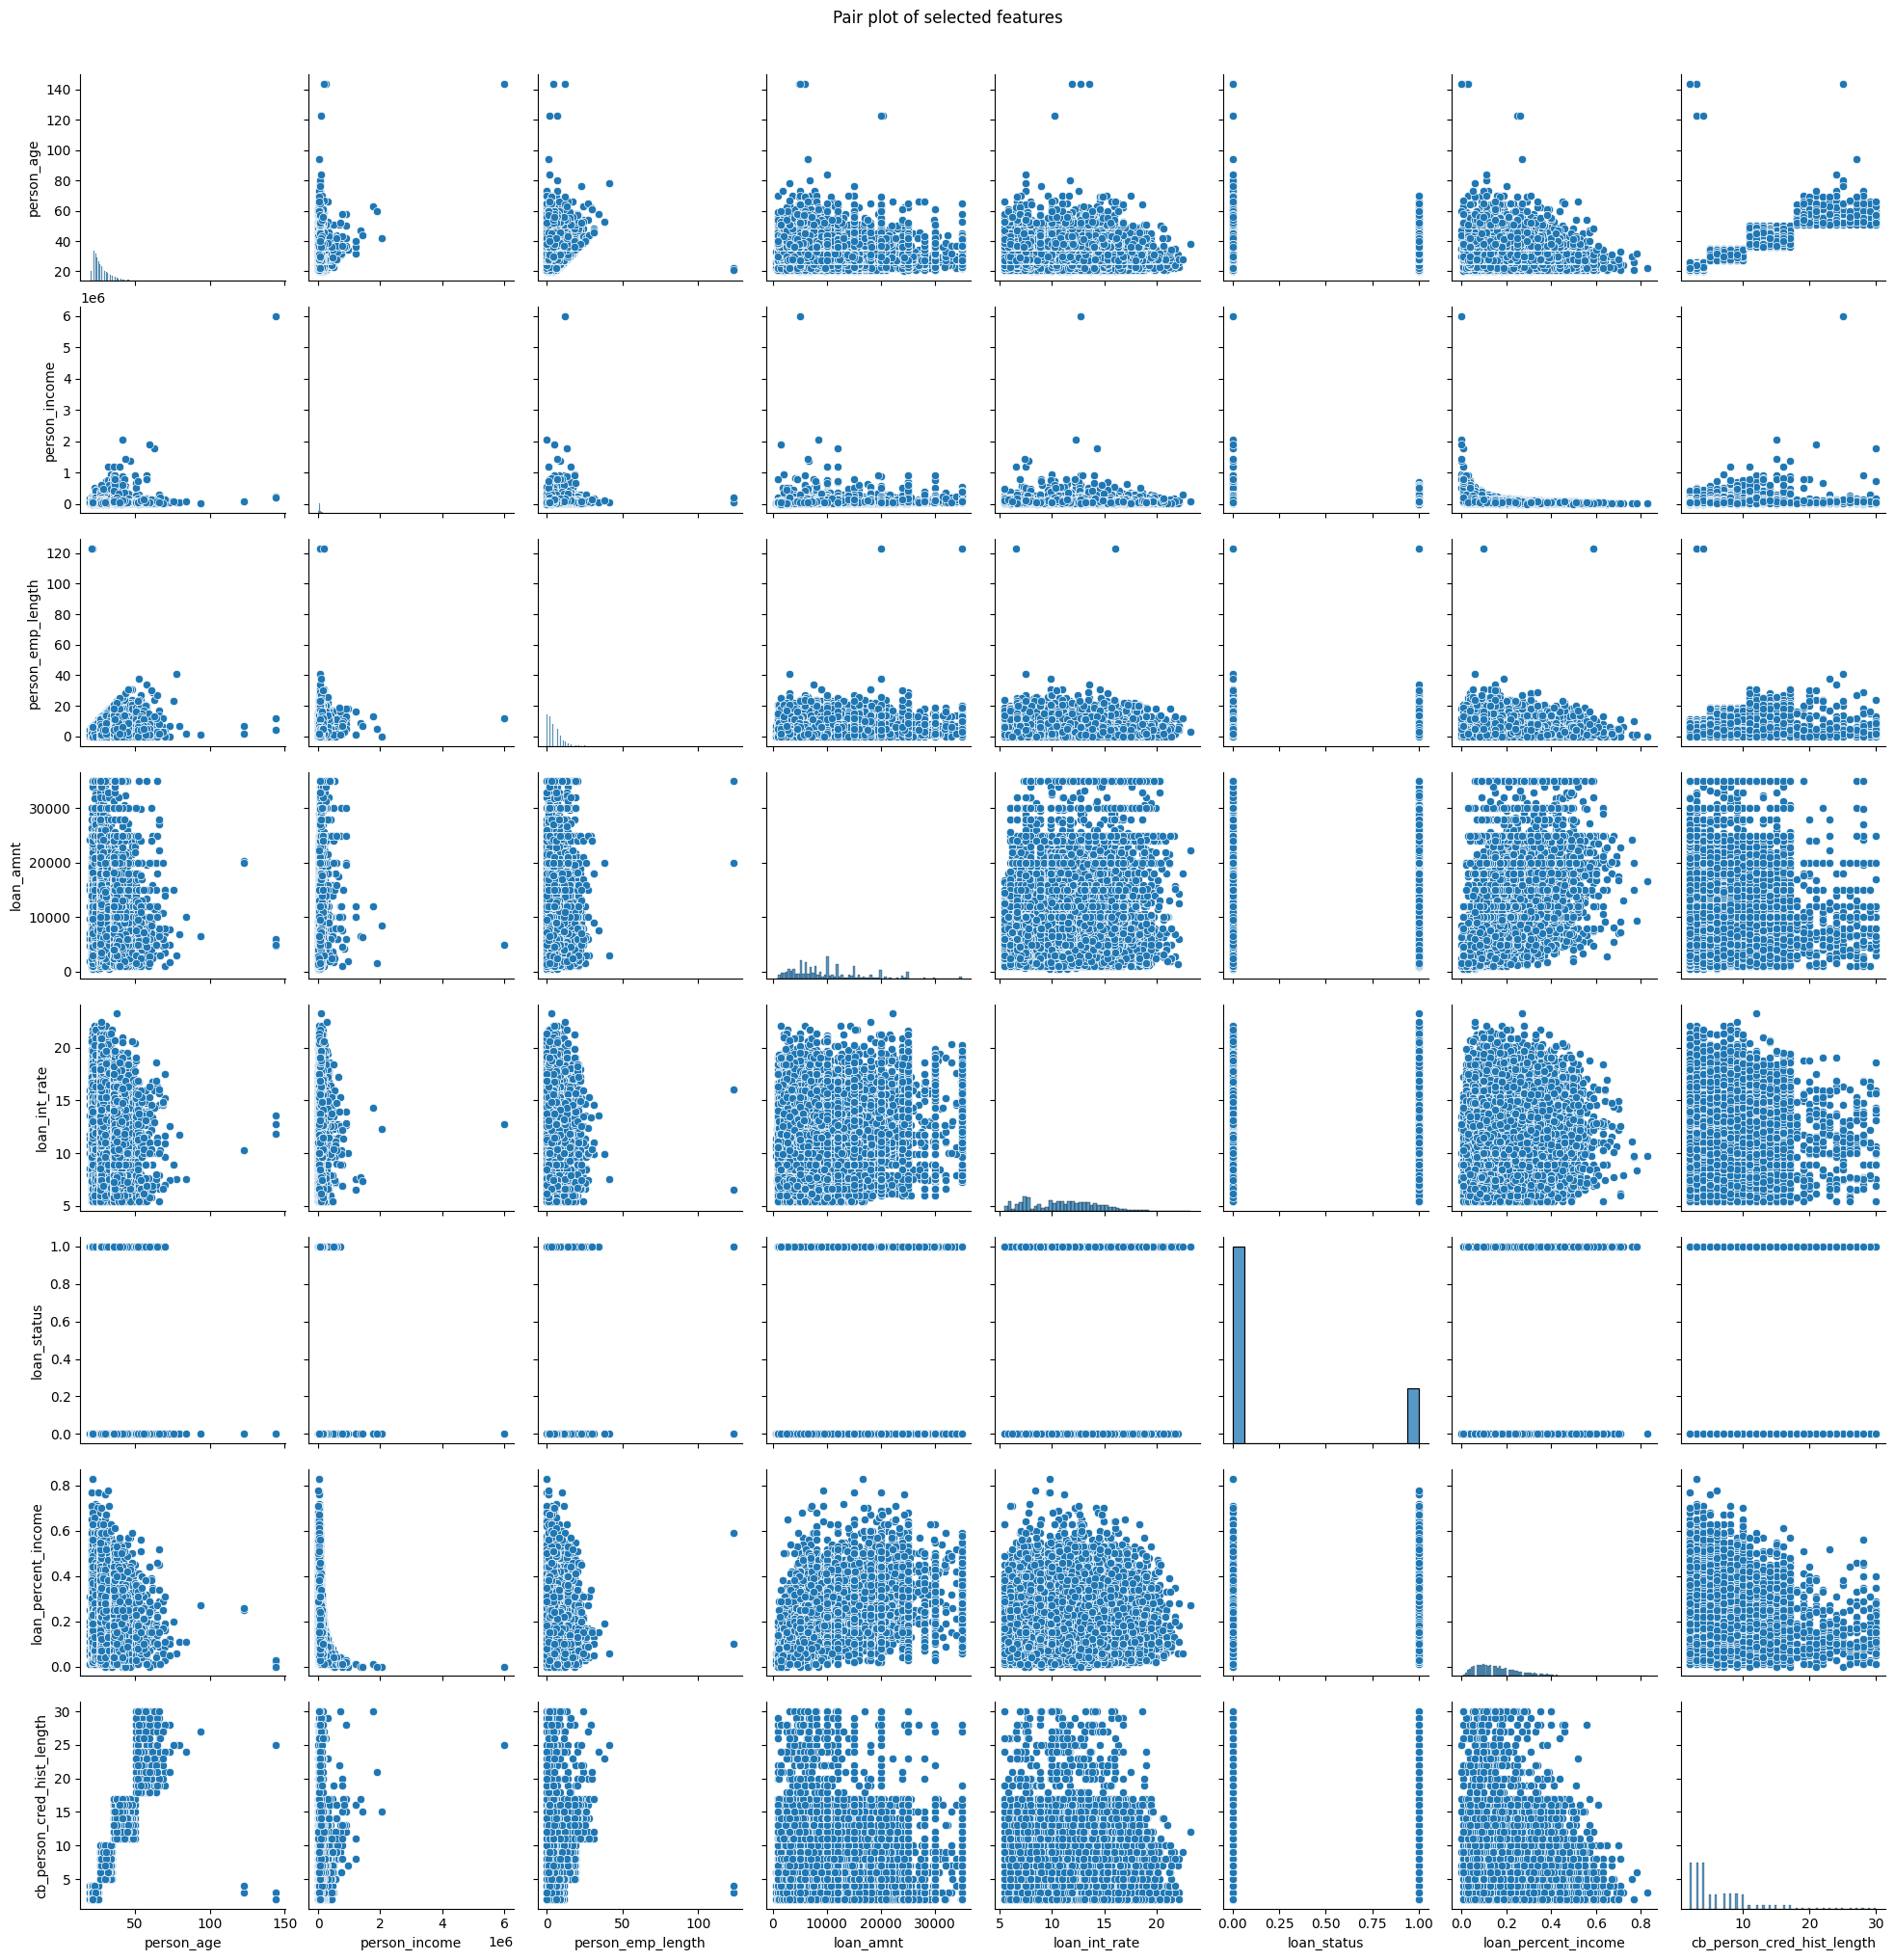

In [14]:
# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()
selected_features = df[['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']]

multivariate_analyzer.analyze(selected_features)

---

### **Insights from Multivariate Analysis**

#### **Correlation Heatmap:**
1. **SalePrice and Overall Qual**:
   - **Insight**: The highest correlation observed is between `SalePrice` and `Overall Qual` (0.80). This strong positive correlation indicates that the overall quality of the house is a significant determinant of its price. 
   - **Implication**: `Overall Qual` should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices.

2. **SalePrice and Gr Liv Area**:
   - **Insight**: The correlation between `SalePrice` and `Gr Liv Area` (0.71) is also strong, indicating that larger homes generally have higher sale prices.
   - **Implication**: Similar to `Overall Qual`, `Gr Liv Area` is another critical predictor of `SalePrice`. This relationship aligns with the expectation that more living space increases a property's value.

3. **Total Bsmt SF**:
   - **Insight**: The correlation between `Total Bsmt SF` and `SalePrice` (0.63) is moderate, suggesting that the size of the basement contributes to the overall value but not as strongly as living area or quality.
   - **Implication**: `Total Bsmt SF` is an important feature, but it may require further exploration or interaction with other features to capture its full effect.

4. **Year Built**:
   - **Insight**: `Year Built` has a lower correlation with `SalePrice` (0.56). While newer homes tend to sell for more, this relationship is less pronounced than those with living area or quality.
   - **Implication**: The age of the house is a relevant factor but might be more meaningful when combined with other features like `Overall Qual` or `Remod/Add Year`.


### **Issues to Address:**
1. **Multicollinearity**:
   - **Issue**: The high correlations between key predictors could lead to multicollinearity in regression models, which could skew the results and reduce model interpretability.
   - **Action**: Conduct VIF analysis to check for multicollinearity. If detected, consider removing or combining correlated features, using regularization techniques, or applying PCA to reduce dimensionality.

2. **Feature Engineering**:
   - **Issue**: Features like `Overall Qual`, which is ordinal, might benefit from specific treatment (e.g., encoding as an ordinal variable) rather than being treated as continuous.
   - **Action**: Consider encoding `Overall Qual` as an ordinal variable. Also, explore interactions between features like `Gr Liv Area` and `Total Bsmt SF` to capture more complex relationships.

3. **Outliers**:
   - **Issue**: The pair plots indicate potential outliers, especially in `Gr Liv Area` and `SalePrice`. These could be high-leverage points that unduly influence model performance.
   - **Action**: Identify and analyze outliers to determine if they should be removed or if the model should be adjusted to account for them (e.g., using robust regression techniques).


In [16]:
df.columns.tolist()

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']